Importación

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

tf.random.set_seed(42)
np.random.seed(42)

print(f"Versión de TensorFlow: {tf.__version__}")

Versión de TensorFlow: 2.20.0


Datos de la Ecuación Cúbica

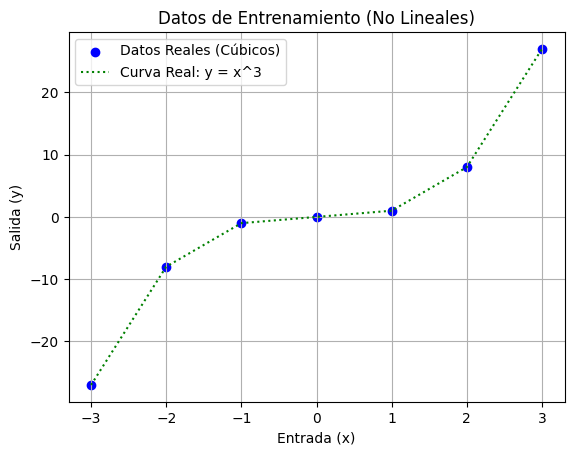

In [2]:
# 1. Generamos los datos de entrada (X)
# Usamos más puntos para que se note la curva
X_train = np.array([-3.0, -2.0, -1.0, 0.0, 1.0, 2.0, 3.0], dtype=float)

# 2. Generamos las salidas (y) siguiendo la ecuación CÚBICA: y = x^3
# Ej: -3^3 = -27,  2^3 = 8
y_train = np.array([-27.0, -8.0, -1.0, 0.0, 1.0, 8.0, 27.0], dtype=float)

# Visualizamos para confirmar que NO es una línea recta
plt.scatter(X_train, y_train, color='blue', label='Datos Reales (Cúbicos)')
plt.plot(X_train, y_train, color='green', linestyle=':', label='Curva Real: y = x^3')
plt.xlabel('Entrada (x)')
plt.ylabel('Salida (y)')
plt.legend()
plt.title('Datos de Entrenamiento (No Lineales)')
plt.grid(True)
plt.show()

Modelo

In [3]:
# Una sola neurona (Modelo Lineal)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=1, input_shape=[1])
])

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.1), loss='mean_squared_error')
model.summary()

c:\Users\Miguel\Desktop\Miguelon\GH\Inteligencia_Artificial_Activities\.venv\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 1)              │             2 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2 (8.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

Entrenamiento

Iniciando entrenamiento...
Entrenamiento finalizado.


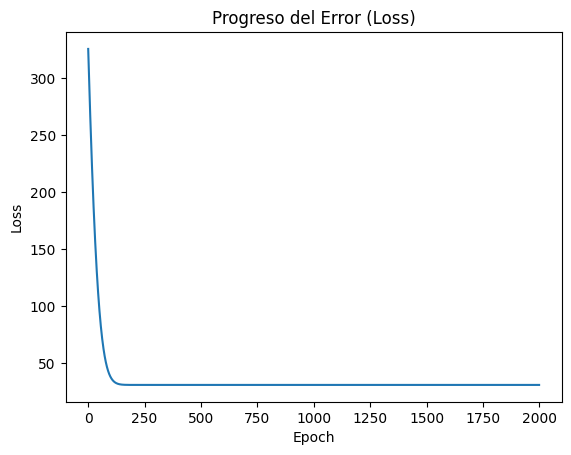

In [4]:
print("Iniciando entrenamiento...")
# Usamos 2000 épocas para tratar de estabilizar la línea
history = model.fit(X_train, y_train, epochs=2000, verbose=0)
print("Entrenamiento finalizado.")

plt.plot(history.history['loss'])
plt.title('Progreso del Error (Loss)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

Verificación y Análisis de Resultados

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step

--- PRUEBA DE PREDICCIÓN ---
Entrada: 3.0
Valor esperado (x^3): 27.0
Predicción de la Neurona Lineal: 21.00
Nota: La predicción tendrá error porque el modelo es lineal y los datos son cúbicos.

--- PARÁMETROS APRENDIDOS ---
La red intentó ajustar una línea: y = 7.00x + -0.00


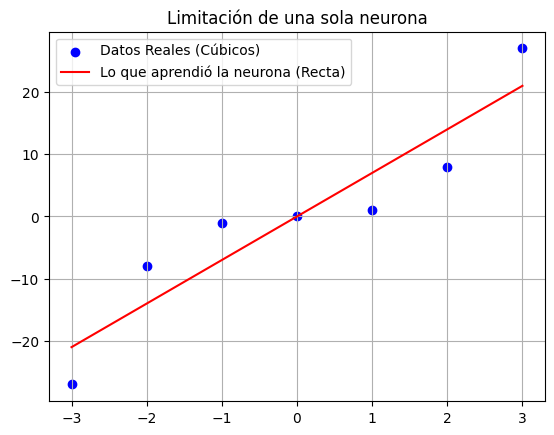

In [6]:
# 1. Predicción
# Si x = 2, y real es 8. Si x = 3, y real es 27.
x_prueba = 3.0
prediccion = model.predict(np.array([[x_prueba]]))  # 2D array: [[3.0]]

print(f"\n--- PRUEBA DE PREDICCIÓN ---")
print(f"Entrada: {x_prueba}")
print(f"Valor esperado (x^3): {x_prueba**3}")
print(f"Predicción de la Neurona Lineal: {prediccion[0][0]:.2f}")
print("Nota: La predicción tendrá error porque el modelo es lineal y los datos son cúbicos.")

# 2. Pesos y Sesgos
capa = model.layers[0]
pesos, sesgos = capa.get_weights()
m = pesos[0][0]
b = sesgos[0]

print(f"\n--- PARÁMETROS APRENDIDOS ---")
print(f"La red intentó ajustar una línea: y = {m:.2f}x + {b:.2f}")

# 3. GRAFICAR EL RESULTADO FINAL (La Realidad vs. Lo que aprendió la red)
plt.scatter(X_train, y_train, color='blue', label='Datos Reales (Cúbicos)')
# Generamos la línea que aprendió la red
y_pred_linea = m * X_train + b
plt.plot(X_train, y_pred_linea, color='red', label='Lo que aprendió la neurona (Recta)')
plt.title('Limitación de una sola neurona')
plt.legend()
plt.grid(True)
plt.show()